### Exercises

#### 1. What are the advantages of a CNN over a fully connected DNN for image classification?
**Answer:**
- **Parameter Sharing**: CNNs use shared weights in convolutional layers, which means the same filter (or set of filters) is used across different parts of the input. This greatly reduces the number of parameters compared to fully connected layers.
- **Sparsity of Connections**: In CNNs, each neuron is connected only to a local region of the input, reducing the number of connections and parameters.
- **Translation Invariance**: CNNs can detect features regardless of their position in the image, thanks to the nature of convolution operations.
- **Hierarchical Feature Learning**: CNNs automatically learn to detect low-level features (like edges) in the initial layers and high-level features (like objects) in deeper layers.

#### 2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.
**Answer:**

1. **First Convolutional Layer**:
   - Input: 200 x 300 x 3
   - Stride: 2
   - "Same" padding ensures the output size is \( $\lceil \frac{\text{input size}}{2} \rceil$ \)
   - Output size (height, width): \( $\lceil \frac{200}{2} \rceil \times \lceil \frac{300}{2} \rceil$ \) = 100 x 150
   - Output: 100 x 150 x 100 (100 feature maps)
   
2. **Second Convolutional Layer**:
   - Input: 100 x 150 x 100
   - Stride: 2
   - Output size (height, width): \( $\lceil \frac{100}{2} \rceil \times \lceil \frac{150}{2} \rceil$ \) = 50 x 75
   - Output: 50 x 75 x 200 (200 feature maps)
   
3. **Third Convolutional Layer**:
   - Input: 50 x 75 x 200
   - Stride: 2
   - Output size (height, width): \( $\lceil \frac{50}{2} \rceil \times \lceil \frac{75}{2} \rceil$ \) = 25 x 38
   - Output: 25 x 38 x 400 (400 feature maps)

##### Total Number of Parameters in the CNN:

1. **First Convolutional Layer**:
   - Number of filters: 100
   - Filter size: \(3 $\times$ 3 $\times$ 3\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 3 = 27\)
   - Total parameters (including biases): \(100 $\times$ (27 + 1) = 2800\)

2. **Second Convolutional Layer**:
   - Number of filters: 200
   - Filter size: \(3 $\times$ 3 $\times$ 100\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 100 = 900\)
   - Total parameters (including biases): \(200 $\times$ (900 + 1) = 180200\)

3. **Third Convolutional Layer**:
   - Number of filters: 400
   - Filter size: \(3 $\times$ 3 $\times$ 200\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 200 = 1800\)
   - Total parameters (including biases): \(400 $\times$ (1800 + 1) = 720400\)

- **Total parameters in the CNN**: \(2800 + 180200 + 720400 = 903400\)

##### RAM Requirement for a Single Instance:

- **Input image size**: \(200 $\times$ 300 $\times$ 3 = 180000\)
- **First layer output size**: \(100 $\times$ 150 $\times$ 100 = 1500000\)
- **Second layer output size**: \(50 $\times$ 75 $\times$ 200 = 750000\)
- **Third layer output size**: \(25 $\times$ 38 $\times$ 400 = 380000\)

- **Total activations**: \(180000 + 1500000 + 750000 + 380000 = 2810000\)

- **Total activations in bytes (32-bit float = 4 bytes)**: \(2810000 $\times$ 4 = 11240000\) bytes = 11.24 MB

- **Parameters in bytes**: \(903400 $\times$ 4 = 3613600\) bytes = 3.61 MB

- **Total RAM for a single instance**: \(11.24 + 3.61 = 14.85\) MB

##### RAM Requirement for a Mini-Batch of 50 Images:

- **Activations for 50 images**: \(2810000 $\times$ 50 = 140500000\)
- **Activations in bytes**: \(140500000 $\times$ 4 = 562000000\) bytes = 562 MB
- **Parameters remain the same**: 3.61 MB

- **Total RAM for a mini-batch of 50 images**: \(562 + 3.61 = 565.61\) MB

##### Summary:

- **Total parameters in the CNN**: 903,400
- **Total RAM for a single instance**: 14.85 MB
- **Total RAM for a mini-batch of 50 images**: 565.61 MB


#### 3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
**Answer:**
1. **Reduce the Mini-Batch Size**: Decreasing the number of samples in each mini-batch reduces memory usage.
2. **Use Model Checkpointing**: Save intermediate states and use gradient checkpointing to recompute parts of the model during backpropagation instead of storing all intermediate activations.
3. **Reduce the Input Image Size**: Decreasing the resolution of input images lowers memory requirements.
4. **Simplify the Model**: Reduce the number of layers or the number of filters per layer to decrease the model size.
5. **Use Mixed Precision Training**: Train the model with mixed precision (using both 16-bit and 32-bit floating point numbers) to save memory.

#### 4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
**Answer:**
- **Dimensionality Reduction**: Max pooling reduces the spatial dimensions of the input, which decreases the computational load and memory usage.
- **Feature Selection**: Max pooling helps retain the most prominent features while discarding less important ones, which can improve generalization.
- **Translation Invariance**: Max pooling introduces a degree of translational invariance, helping the network recognize objects regardless of minor positional changes.

#### 5. When would you want to add a local response normalization layer?
**Answer:**
- **Competitive Normalization**: Local response normalization (LRN) layers can help highlight significant features by normalizing the responses across neighboring neurons, making the network more sensitive to strong activations.
- **Improving Generalization**: LRN can improve generalization by reducing overfitting, especially in early layers of the network.
- **Used in Specific Architectures**: LRN layers were particularly popular in earlier architectures like AlexNet but are less commonly used in modern architectures.

#### 6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?
**Answer:**
- **AlexNet**: 
  - Deeper network with more filters per layer.
  - Use of ReLU activation functions instead of tanh or sigmoid.
  - Overlapping max pooling.
  - Dropout for regularization.
  - Data augmentation to reduce overfitting.
  - Use of GPUs for faster training.
  
- **GoogLeNet (Inception)**:
  - Inception modules that allow multiple convolutions with different kernel sizes to run in parallel.
  - Reduction in the number of parameters by using 1x1 convolutions.
  - Deep network with 22 layers.

- **ResNet**:
  - Introduction of residual connections (skip connections) to alleviate the vanishing gradient problem and enable training of very deep networks.
  - Identity mappings in skip connections to make the optimization easier.

- **SENet**:
  - Introduction of Squeeze-and-Excitation (SE) blocks that adaptively recalibrate channel-wise feature responses by explicitly modeling interdependencies between channels.
  
- **Xception**:
  - Extreme version of Inception, where Inception modules are replaced with depthwise separable convolutions.
  - Efficient combination of depthwise and pointwise convolutions to reduce computational cost while maintaining performance.

#### 7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
**Answer:**
- **Fully Convolutional Network (FCN)**: A network composed entirely of convolutional layers, without any dense (fully connected) layers, typically used for tasks like semantic segmentation where spatial information must be preserved throughout the network.
  
- **Converting a Dense Layer to a Convolutional Layer**: 
  - A dense layer with \(n\) neurons can be replaced by a convolutional layer with \(n\) filters of size 1x1. This makes each output feature map correspond to a single neuron in the dense layer while maintaining the spatial dimensions of the input.

#### 8. What is the main technical difficulty of semantic segmentation?
**Answer:**
- **Precise Localization**: Semantic segmentation requires precise pixel-level classification, which is challenging because it demands accurate spatial information throughout the network. Maintaining high-resolution features and combining contextual information effectively while preserving spatial details is technically difficult. This often requires a combination of downsampling for context and upsampling (with techniques like deconvolution or unpooling) to restore spatial resolution.

#### 9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [1]:
from utils import set_seed
import os

set_seed()

ROOT_DIR = './'
datapath = os.path.join(ROOT_DIR, 'datasets')
os.makedirs(datapath, exist_ok=True)

2024-05-27 23:45:17.528248: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 23:45:19.131715: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the MNIST dataset using tfds
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train[:80%]', 'train[80%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir=datapath
)


/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-27 23:45:35.071497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 23:45:35.296996: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


##### Normalize the data (0-1)

In [3]:
# Normalize the images to [0, 1]
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)


##### Helper funcion to visualize the data

In [5]:
import matplotlib.pyplot as plt

# Function to visualize a batch of images
def visualize_batch(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

2024-05-27 23:09:46.097517: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


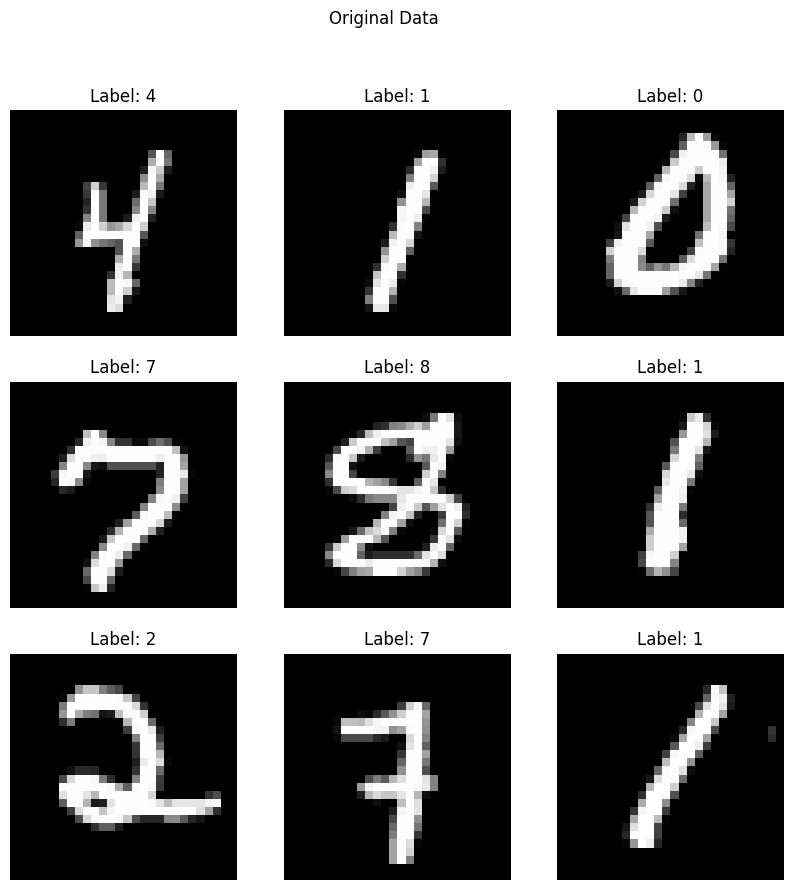

2024-05-27 23:09:46.587549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# Visualize the original data
for images, labels in ds_train.batch(9).take(1):
    visualize_batch(images, labels, "Original Data")

##### Create the augmentation pipeline and augmentation function

In [8]:
# Set up the data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1)
])

In [9]:
# Apply data augmentation to the dataset
def augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label

##### Augment the data

In [10]:
ds_train_augmented = ds_train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val_augmented = ds_val.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)


2024-05-27 23:15:16.361897: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


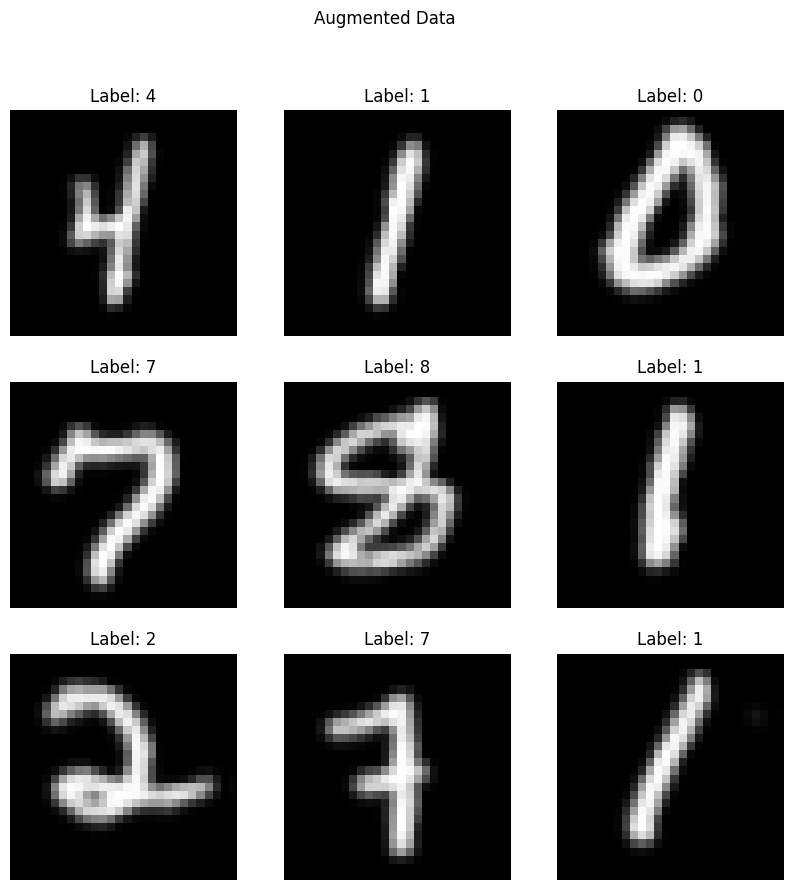

2024-05-27 23:15:16.682123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
# Visualize the augmented data
for images, labels in ds_train_augmented.batch(9).take(1):
    visualize_batch(images, labels, "Augmented Data")

In [12]:
# Batch and prefetch the datasets
batch_size = 32
ds_train_augmented = ds_train_augmented.cache().shuffle(10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_val_augmented = ds_val_augmented.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)


##### Build the model

In [13]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(ds_train_augmented, epochs=10, validation_data=ds_val_augmented)

Epoch 1/10


I0000 00:00:1716848528.851407   12041 service.cc:145] XLA service 0x7d22f0002a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716848528.851440   12041 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti with Max-Q Design, Compute Capability 6.1
2024-05-27 23:22:08.898600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-27 23:22:09.541874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:458] Loaded runtime CuDNN library: 8.0.4 but source was compiled with: 8.9.6.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-05-27 23:22:09.557891: E external/local_xla/x

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_11665/2108383217.py", line 2, in <module>

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/home/im-ik01/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_2546]